# Financial Programming - IÉSEG, Lille - MBD 2020-2021
## Group Project - Financial Data

GROUP 5: 

Prineet KAUR, Carl CHAHINE, Alessio ROSATO

### Data Exploration

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Client Table

In [2]:
# Each record describes characteristics of a client
client = pd.read_csv('./data_berka/client.asc', sep=';')
client.info()

# Extract the year, month, and day from birth_number and create 3 new columns

client['birth_number'].astype(str)

client['birth_year'] = client['birth_number'].astype(str).str[:2]
client['birth_month'] = client['birth_number'].astype(str).str[2:4]
client['birth_day'] = client['birth_number'].astype(str).str[-2:]

client['birth_year'] = '19' + client['birth_year']
client['birth_year'] = client['birth_year'].astype(int)

client['birth_day'] = client['birth_day'].astype(int)

# Create the gender column based on the birth month

client['gender'] = 'M'
client.loc[client['birth_month'].astype(int) > 50, 'gender'] = 'F'

client.loc[client['birth_month'].astype(int) > 50, 'birth_month'] = client.loc[client['birth_month'].astype(int) > 50, 'birth_month'].astype(int) - 50
client['birth_month'] = client['birth_month'].astype(int)

# Create age and age_group variables. Assuming that the current year is 1999

client['age'] = 1999 - client['birth_year']

client['age_group'] = (client['age'] // 10) *10

client.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-null   int64
 1   birth_number  5369 non-null   int64
 2   district_id   5369 non-null   int64
dtypes: int64(3)
memory usage: 126.0 KB


,client_id,birth_number,district_id,birth_year,birth_month,birth_day,gender,age,age_group
0,1,706213,18,1970,12,13,F,29,20
1,2,450204,1,1945,2,4,M,54,50
2,3,406009,1,1940,10,9,F,59,50
3,4,561201,5,1956,12,1,M,43,40
4,5,605703,5,1960,7,3,F,39,30


# Loan Table

In [3]:
# Each record describes characteristics of a loan
loan = pd.read_csv('./data_berka/loan.asc', sep=';')
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loan_id     682 non-null    int64  
 1   account_id  682 non-null    int64  
 2   date        682 non-null    int64  
 3   amount      682 non-null    int64  
 4   duration    682 non-null    int64  
 5   payments    682 non-null    float64
 6   status      682 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 37.4+ KB


# Account Table

**Input data**

In [4]:
# Each record describes static characteristics of an account
account = pd.read_csv('./data_berka/account.asc', sep=';')
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 140.8+ KB


# Card Table

In [5]:
# Each record describes a credit card issued to an account
card = pd.read_csv('./data_berka/card.asc', sep=';')
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  892 non-null    int64 
 1   disp_id  892 non-null    int64 
 2   type     892 non-null    object
 3   issued   892 non-null    object
dtypes: int64(2), object(2)
memory usage: 28.0+ KB


# Disp Table

In [6]:
# Each record relates together a client with an account i.e. this relation describes the rights
# of clients to operate accounts
disp = pd.read_csv('./data_berka/disp.asc', sep=';')

#Let's merge disp and card because they both use disp_id and we're gonna remove this column
disp_card = pd.merge(disp,card, on = 'disp_id',how = 'outer')

disp_card.head()
disp_card = disp_card.pivot_table(index = 'client_id',
                        columns = 'type_y',
                        values = 'account_id',
                        aggfunc = 'count')

disp_card = disp_card.fillna(0)
disp_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892 entries, 9 to 13968
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   classic  892 non-null    float64
 1   gold     892 non-null    float64
 2   junior   892 non-null    float64
dtypes: float64(3)
memory usage: 27.9 KB


# Trans Table 

In [7]:
# Each record describes one transaction on an account
trans = pd.read_csv('./data_berka/trans.asc', sep=';', low_memory=False)

#Convert trans_id to int so that we can index it
trans.trans_id = pd.to_numeric(trans.trans_id, errors='coerce').astype('Int64')

trans.set_index('trans_id',drop =False, inplace =True)
trans.sort_index(axis = 0)
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
trans_id,,,,,,,,,,
695247,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
171812,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
207264,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
1117247,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
579373,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [8]:
#Checking that the column doesn't have values that should be in Operations
print(trans[trans['type'] == 'VYBER']['operation'].unique())
print(trans[trans['type'] == 'PREVOD NA UCET']['operation'].unique())
print(trans[trans['type'] == "PREVOD Z UCTU"]['operation'].unique())
print(trans[trans['type'] == 'VKLAD']['operation'].unique())
print(trans[trans['type'] == "VYBER KARTOU"]['operation'].unique())

#Replacing the values in the type column with the value they should have
# and changing the names to make it more understandable.
trans.loc[trans['type'] == 'VYBER','type'] = 'VYDAJ'
trans.loc[trans['type'] == 'VYDAJ','type'] = 'withdrawal'
trans.loc[trans['type'] == 'PRIJEM','type'] = 'credit'

trans.loc[trans['operation'] == 'VYBER KARTOU','operation'] = 'cc withdrawal'
trans.loc[trans['operation'] == 'VKLAD','operation'] = 'credit in cash'
trans.loc[trans['operation'] == 'PREVOD Z UCTU','operation'] = 'collection from another bank'
trans.loc[trans['operation'] == 'VYBER','operation'] = 'Withdrawal in cash'
trans.loc[trans['operation'] == 'PREVOD NA UCET','operation'] = 'remittance to another bank'

['VYBER']
[]
[]
[]
[]


In [9]:
#Finding where the missing values of operations appear in relation with the type

print(trans[trans['type'] == 'withdrawal']['operation'].isna().sum())
print(trans[trans['type'] == "credit"]['operation'].isna().sum())
print("")

# Missing values in operations are either "collection from another bank", "Credit in cash" or "remittance from another bank" 
#because they are only related to credit so we see how much % is each and we fill the missing values accordingly

pv_trans = trans.pivot_table(index = 'operation',
                 columns = 'type',
                 values = 'amount',
                 aggfunc = sum)
print(pv_trans)
print("")
cash_with = pv_trans.loc["collection from another bank","credit"]/(pv_trans.iloc[2,0]+pv_trans.iloc[3,0])
print(round(cash_with,2))
print("")
cred_cash = 1-cash_with
print(round(cred_cash,2))

0
183114

type                                credit    withdrawal
operation                                               
Withdrawal in cash                     NaN  2.339513e+09
cc withdrawal                          NaN  1.817040e+07
collection from another bank  7.814800e+08           NaN
credit in cash                2.418522e+09           NaN
remittance to another bank             NaN  6.726378e+08

0.24

0.76


In [10]:
# Let's fill 24% of empty values with cc withdrawal based on the query above

nbr_of_rows_to_fill_for_cc = 0.24 * trans.operation.isna().sum()

print(nbr_of_rows_to_fill_for_cc)

# Now we use a range to see which values to substitute with cc withdrawal
cc = trans.loc[( (trans['type'] == 'credit') & (trans.operation.isna()) ),'trans_id']

#Now we substitute the range above with the operation cc withdrawal and add a column to specify updated cells
trans.loc[trans.operation.isna(),'operations is NA'] = 'Missing'
trans.loc[trans['operations is NA'].isna(),'operations is NA'] = 'No'

trans.loc [cc[0:43947] , 'operation'] ="collection from another bank"

43947.36


In [11]:
# and the rest with cash withdrawal
trans.loc[(trans.operation.isna()) & (trans.type == 'credit'),'operation']='credit in cash'
trans.operation.isna().sum()

0

In [12]:
#Replace the names with understandable ones
trans.loc[trans.k_symbol.isna(), 'k_symbol is NA'] = 'Missing'
trans.loc[trans['k_symbol is NA'].isna(), 'k_symbol is NA'] = 'No'

trans.loc[trans['k_symbol'] == "POJISTNE", "k_symbol"]= 'insurance'
trans.loc[trans['k_symbol'] == "SLUZBY", "k_symbol"]= 'payment for statement'
trans.loc[trans['k_symbol'] == "UROK", "k_symbol"]= 'interest credited'
trans.loc[trans['k_symbol'] == "SANKC. UROK", "k_symbol"]= 'sanctions'
trans.loc[trans['k_symbol'] == "SIPO", "k_symbol"]= 'household' 
trans.loc[trans['k_symbol'] == "DUCHOD", "k_symbol"]= 'old age pension'
trans.loc[trans['k_symbol'] == "UVER", "k_symbol"]= 'loan payment'

#Making sure that there are no wrong values
trans.loc[trans.k_symbol.isna(), 'k_symbol'] = None
trans.loc[trans.k_symbol == ' ', 'k_symbol'] = None

print(trans.k_symbol.unique())
print(' ')

print(trans[trans['type'] == 'withdrawal']['k_symbol'].isna().sum())
print(trans[trans['type'] == "credit"]['k_symbol'].isna().sum())

[None 'old age pension' 'interest credited' 'household'
 'payment for statement' 'insurance' 'sanctions' 'loan payment']
 
343683
191631


In [13]:
pc = trans.pivot_table(index = 'k_symbol',
                 columns = 'type',
                 values = 'amount',
                 aggfunc = 'count')
print(pc)
print("")

prct = pc.loc['payment for statement','withdrawal']/(pc.loc['payment for statement','withdrawal']+pc.loc['sanctions','withdrawal'])
# 99% of k_symbols that pay less than 30$ are payment for statement -> we replace all missing values <30 with payment for statement

print('')
print(prct)

pm = trans.pivot_table(index = 'k_symbol',
                 columns = 'type',
                 values = 'amount',
                 aggfunc = 'mean')
print('')
print(pm)

x = trans[(trans['amount'] < 30) & (trans.k_symbol.isna())]['trans_id']
trans.loc[x,'k_symbol'] ='payment for statement'

type                     credit  withdrawal
k_symbol                                   
household                   NaN    118065.0
insurance                   NaN     18500.0
interest credited      183114.0         NaN
loan payment                NaN     13580.0
old age pension         30338.0         NaN
payment for statement       NaN    155832.0
sanctions                   NaN      1577.0


0.9899815131282201

type                        credit   withdrawal
k_symbol                                       
household                      NaN  4222.304798
insurance                      NaN  1306.767189
interest credited       150.019603          NaN
loan payment                   NaN  4068.652673
old age pension        5520.209572          NaN
payment for statement          NaN    17.239195
sanctions                      NaN    23.882879


In [14]:
#Let's group by to see missing values

trans['grouped_amounts']=(trans['amount'] // 5000) * 5000
   
a = trans.pivot_table(index = 'grouped_amounts',
                 columns = 'k_symbol',
                 values = 'type',
                 aggfunc = 'count') # Most missing values of the k_symbols are <5000$
a

k_symbol,household,insurance,interest credited,loan payment,old age pension,payment for statement,sanctions
grouped_amounts,,,,,,,
0.0,80491.0,17428.0,183114.0,9250.0,10083.0,157579.0,1577.0
5000.0,32688.0,1004.0,NaN,4330.0,20255.0,NaN,NaN
10000.0,4608.0,68.0,NaN,NaN,NaN,NaN,NaN
15000.0,278.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
trans['grouped_amounts']=(trans['amount'] // 2500) * 2500

a = trans.pivot_table(index = 'grouped_amounts',
                 columns = 'k_symbol',
                 values = 'trans_id',
                 aggfunc = 'count')

print(a)
print('')
#let's find percentages of the k_symbol smaller than 2500

# We should replace all creditted amounts < 2500 by interest as Old age pension is Nan
trans.loc[(trans.amount <= 2500) & (trans.type == 'credit') & (trans.k_symbol.isna()) ,'k_symbol'] = 'interest credited'

pct_household = 38048/(38048+15387+3711+1577+157579)
print(pct_household) # 18% (38,934 items to be replaced by household)

pct_insurance = 15387/(38048+15387+3711+1577+157579)
print(pct_insurance) # 7% (15,141 items to be replaced by insurance)

pct_statement = 157579/(38048+15387+3711+1577+157579)
print(pct_statement) # 73% we then replace the rest by payment for statement

id2 = trans.loc[(trans.amount <= 2500) & (trans.type == 'withdrawal') & (trans.k_symbol.isna()),'trans_id']
trans.loc[id2.head(15141),'k_symbol'] = 'insurance'
trans.loc[id2.tail(38934),'k_symbol'] = 'household'
trans.loc[(trans.k_symbol.isna()) & (trans.type == 'withdrawal') & (trans.amount <= 2500),'k_symbol'] = 'payment for statement'

k_symbol         household  insurance  interest credited  loan payment  \
grouped_amounts                                                          
0.0                38048.0    15387.0           183114.0        3711.0   
2500.0             42443.0     2041.0                NaN        5539.0   
5000.0             20349.0      831.0                NaN        3242.0   
7500.0             12339.0      173.0                NaN        1088.0   
10000.0             2775.0       16.0                NaN           NaN   
12500.0             1833.0       52.0                NaN           NaN   
15000.0              241.0        NaN                NaN           NaN   
17500.0               37.0        NaN                NaN           NaN   

k_symbol         old age pension  payment for statement  sanctions  
grouped_amounts                                                     
0.0                          NaN               157579.0     1577.0  
2500.0                   10083.0                    

In [16]:
# Let's see the % of amounts between 2500 and 5000
# We replace all the credited amounts between 2500 and 5000 by old age pension
trans.loc[(trans.amount <= 5000) & (trans.amount > 2500) & (trans.type == 'credit') & (trans.k_symbol.isna()),'k_symbol'] = 'old age pension'

#Let's see % of withdrawal amounts
pct_loan = (5539)/(2041 + 42443 + 5539 )
print(pct_loan) #11% (We replace 5502 by loan)

pct_house = (42443)/(2041 + 42443 + 5539) #85% of trans are household lets replace 90% of missing by household
print(pct_house) #71% (We replace the rest by house)

id2 = trans.loc[(trans.amount <= 5000) & (trans.amount > 2500) & (trans.type == 'withdrawal') & (trans.k_symbol.isna()),'trans_id']

trans.loc[id2.head(5502),'k_symbol'] = 'loan payment'
trans.loc[(trans.amount <= 5000) & (trans.amount > 2500) & (trans.type == 'withdrawal') & (trans.k_symbol.isna()),'k_symbol'] = 'household'

0.11072906463027007
0.8484697039361894


In [17]:
# The only k_symbol with amounts > 5k and is credit is old age pension, so all reamining amount that are credit are old age pension
a1 = trans.loc[( (trans.type == 'credit' ) & (trans.k_symbol.isna()) ),'trans_id']
trans.loc[a1,'k_symbol'] = 'old age pension' 

# The only k_symbol with amounts > 5k and is Withdrawal are Households, loan and insurance

pct_loan = 4330/(37574+1072+4330)
print(pct_loan) # 10% (we replace 4297 items with loan)

pct_house = 37574/(37574+1072+4330)
print(pct_house) # 87% (we replace the rest with household)

id4 = trans.loc[(trans.k_symbol.isna()) & (trans.type == 'withdrawal') & (trans.amount>5000),'trans_id']
trans.loc[id4.head(4297),'k_symbol'] = 'loan payment'
trans.loc[(trans.k_symbol.isna()) & (trans.type == 'withdrawal') & (trans.amount>5000),'k_symbol'] = 'household'
trans.k_symbol.isna().sum()

0.10075390915860015
0.8743019359642591


0

In [18]:
#Now let's check for outliers in the amount
trans.amount.quantile([0.25,0.5,0.75]) #1st quartile is 135.9 and third is 6800$

quart1 = pd.DataFrame(trans.amount.quantile([0.25,0.5,0.75])).loc[0.25,] / 2
quart3 = 2 * pd.DataFrame(trans.amount.quantile([0.25,0.5,0.75])).loc[0.75,:]

print(quart1)
print(quart3)

#Let's add a column outlier where we specify rows that we want to update
trans.loc[(trans.amount > 13600) | (trans.amount < 67.95),'outlier'] = 'Yes'
trans.loc[trans.outlier.isna(),'outlier'] = 'No'

# We will consider outliers as 2 * 3rd Quartiles, let's replace the outliers by 2 * 3rd quartile
trans.loc[trans.amount > 13600,'amount'] = 13600

# We will consider outliers as 1st Quartiles / 2, let's replace the outliers by 1st quartile/2
trans.loc[trans.amount < 67.95 ,'amount'] = 67.95

amount    67.95
Name: 0.25, dtype: float64
amount    13600.0
Name: 0.75, dtype: float64


In [19]:
b = pd.DataFrame(trans[['bank','account']])
b.loc[b.account.notna(),'bank'].isna().sum()

21881

In [20]:
trans.loc[trans.bank.isna(),'Bank is na'] = 'Missing'
trans.loc[trans['Bank is na'].isna(),'Bank is na'] = 'No'

trans.loc[trans.bank.isna(),'bank'] = 'Other'

trans.loc[trans.account.isna(),'Account is na'] = 'Missing'
trans.loc[trans['Account is na'].isna(),'Account is na'] = 'No'

trans.loc[trans.account.isna(),'account'] = 'Other'
trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1056320 entries, 695247 to 3626540
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   trans_id          1056320 non-null  Int64  
 1   account_id        1056320 non-null  int64  
 2   date              1056320 non-null  int64  
 3   type              1056320 non-null  object 
 4   operation         1056320 non-null  object 
 5   amount            1056320 non-null  float64
 6   balance           1056320 non-null  float64
 7   k_symbol          1056320 non-null  object 
 8   bank              1056320 non-null  object 
 9   account           1056320 non-null  object 
 10  operations is NA  1056320 non-null  object 
 11  k_symbol is NA    1056320 non-null  object 
 12  grouped_amounts   1056320 non-null  float64
 13  outlier           1056320 non-null  object 
 14  Bank is na        1056320 non-null  object 
 15  Account is na     1056320 non-null  object 
dtype

In [21]:
# Let's fix the trans table per customer for the joins

Ntrans = trans.pivot_table(index = 'account_id',
                          columns = 'k_symbol',
                          values = 'amount',
                          aggfunc = sum)
Ntrans = Ntrans.fillna(0)
Ntrans.head()

k_symbol,household,insurance,interest credited,loan payment,old age pension,payment for statement,sanctions
account_id,,,,,,,
1,151970.0,0.0,16410.25,0.0,178155.0,31018.00,0.0
2,1190011.0,10300.0,15871.95,253985.8,995300.0,29016.75,0.0
3,66712.0,46007.0,9225.00,0.0,163889.0,9937.35,0.0
4,108062.0,0.0,3556.25,0.0,188802.0,52110.55,0.0
5,62822.0,0.0,2226.45,0.0,95323.0,7321.30,0.0


# Order Table

In [22]:
# Each record describes one order on an account
order = pd.read_csv('./data_berka/order.asc', sep=';', low_memory=False)

order.head()

#Let's fix the names of the k_symbol
order.loc[order.k_symbol == 'POJISTNE','k_symbol'] = 'insurance'
order.loc[order.k_symbol == 'SIPO','k_symbol'] = 'household'
order.loc[order.k_symbol == 'UVER','k_symbol'] = 'loan'


#Create a pv to get one row per client
order1 = order.pivot_table(index = 'account_id',
                          columns = 'k_symbol',
                          values = 'order_id',
                          aggfunc = 'count')

order1 = order1.fillna(0)

order1.reset_index(drop = False, inplace = True)
order1 = order1.drop(order1.columns[1], axis=1)

order1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3758 entries, 0 to 3757
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   account_id  3758 non-null   int64  
 1   LEASING     3758 non-null   float64
 2   household   3758 non-null   float64
 3   insurance   3758 non-null   float64
 4   loan        3758 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 146.9 KB


# Loan Table

In [23]:
# Each record describes a loan granted for a given account
loan = pd.read_csv('./data_berka/loan.asc', sep=';')
loan.info()
loan.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loan_id     682 non-null    int64  
 1   account_id  682 non-null    int64  
 2   date        682 non-null    int64  
 3   amount      682 non-null    int64  
 4   duration    682 non-null    int64  
 5   payments    682 non-null    float64
 6   status      682 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 37.4+ KB


,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [24]:
# Let's check for outliers in the loan table
print(loan.amount.quantile([0.25,0.5,0.75]))

loan.loc[(loan.amount < 66732 / 2) | (loan.amount > 210654 * 2), 'outlier'] = 'Yes'
loan.loc[loan.outlier.isna(),'outlier'] = 'No'

#Let's replace the outliers with 2 * 3rd quartile and 1st quartile/2
loan.loc[loan.amount < 66732 / 2, 'amount'] = 66732 / 2
loan.loc[loan.amount > 210654 * 2,'amount'] = 210654 * 2

0.25     66732.0
0.50    116928.0
0.75    210654.0
Name: amount, dtype: float64


In [25]:
#Let's group the loan table per customer


Nloan= loan.pivot_table(index = 'account_id',
                        columns = 'status',
                        values = 'loan_id',
                        aggfunc = 'count') 
#Nloan.loc[Nloan.isna(),['A','B','C','D']] = 0

Nloan = Nloan.fillna(0)
Nloan.head()

status,A,B,C,D
account_id,,,,
2,1.0,0.0,0.0,0.0
19,0.0,1.0,0.0,0.0
25,1.0,0.0,0.0,0.0
37,0.0,0.0,0.0,1.0
38,0.0,0.0,1.0,0.0


# District Table

In [26]:
# Each record describes demographic characteristics of a district.
district = pd.read_csv('./data_berka/district.asc', sep=';')

district = district.rename(columns={'A1': 'district_id'})
district = district.rename(columns={'A2': 'district name'})
district = district.rename(columns={'A3': 'region'})
district = district.rename(columns={'A4': 'no. of inhabitants'})
district = district.rename(columns={'A5': 'no. of municipalities with inhabitants < 499'})
district = district.rename(columns={'A6': 'no. of municipalities with inhabitants 500-1999'})
district = district.rename(columns={'A7': 'no. of municipalities with inhabitants 2000-9999'})
district = district.rename(columns={'A8': 'no. of municipalities with inhabitants >10000'})
district = district.rename(columns={'A9': 'no. of cities'})
district = district.rename(columns={'A10': 'ratio of urban inhabitants'})
district = district.rename(columns={'A11': 'average salary'})
district = district.rename(columns={'A12': 'unemploymant rate 95'})
district = district.rename(columns={'A13': 'unemploymant rate 96'})
district = district.rename(columns={'A14': 'no. of enterpreneurs per 1000 inhabitants'})
district = district.rename(columns={'A15': 'no. of commited crimes 95'})
district = district.rename(columns={'A16': 'no. of commited crimes 96'})

district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   district_id                                       77 non-null     int64  
 1   district name                                     77 non-null     object 
 2   region                                            77 non-null     object 
 3   no. of inhabitants                                77 non-null     int64  
 4   no. of municipalities with inhabitants < 499      77 non-null     int64  
 5   no. of municipalities with inhabitants 500-1999   77 non-null     int64  
 6   no. of municipalities with inhabitants 2000-9999  77 non-null     int64  
 7   no. of municipalities with inhabitants >10000     77 non-null     int64  
 8   no. of cities                                     77 non-null     int64  
 9   ratio of urban inhabita

# Joining all Tables One by One Using CONCAT (INNER JOIN) 

In [27]:
# Joining tables Client and District using "district_id"
client_distr = pd.concat([client.set_index('district_id',drop=False), district.set_index('district_id',drop=False)], axis=1, join='inner')
client_distr.head()

,client_id,birth_number,district_id,birth_year,birth_month,birth_day,gender,age,age_group,district_id,...,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate 95,unemploymant rate 96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes 95,no. of commited crimes 96
district_id,,,,,,,,,,,,,,,,,,,,,
18,1,706213,18,1970,12,13,F,29,20,18,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
1,2,450204,1,1945,2,4,M,54,50,1,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,3,406009,1,1940,10,9,F,59,50,1,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
5,4,561201,5,1956,12,1,M,43,40,5,...,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
5,5,605703,5,1960,7,3,F,39,30,5,...,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [28]:
# Joining tables Client and Disp using "client_id"
client_disp = pd.concat([client.set_index('client_id',drop=False), disp.set_index('client_id')], axis=1, join='inner')
client_disp.head()

,client_id,birth_number,district_id,birth_year,birth_month,birth_day,gender,age,age_group,disp_id,account_id,type
client_id,,,,,,,,,,,,
1,1,706213,18,1970,12,13,F,29,20,1,1,OWNER
2,2,450204,1,1945,2,4,M,54,50,2,2,OWNER
3,3,406009,1,1940,10,9,F,59,50,3,2,DISPONENT
4,4,561201,5,1956,12,1,M,43,40,4,3,OWNER
5,5,605703,5,1960,7,3,F,39,30,5,3,DISPONENT


In [29]:
# Joining tables Disp and Card using "disp_id"
disp_card = pd.concat([disp.set_index('disp_id',drop=False), card.set_index('disp_id')], axis=1, join='inner')
disp_card.head()

,disp_id,client_id,account_id,type,card_id,type,issued
disp_id,,,,,,,
9,9,9,7,OWNER,1,gold,981016 00:00:00
19,19,19,14,OWNER,2,classic,980313 00:00:00
41,41,41,33,OWNER,3,gold,950903 00:00:00
42,42,42,34,OWNER,4,classic,981126 00:00:00
51,51,51,43,OWNER,5,junior,950424 00:00:00


In [30]:
# Joining tables Account and District using "district_id"
acc_distr = pd.concat([account.set_index('district_id',drop=False), district.set_index('district_id')], axis=1, join='inner')
acc_distr.head()

,account_id,district_id,frequency,date,district name,region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate 95,unemploymant rate 96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes 95,no. of commited crimes 96
district_id,,,,,,,,,,,,,,,,,,,
55,576,55,POPLATEK MESICNE,930101,Brno - venkov,south Moravia,157042,49,70,18,0,9,33.9,8743,1.88,2.43,111,3659,3894
74,3818,74,POPLATEK MESICNE,930101,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782,18347
55,704,55,POPLATEK MESICNE,930101,Brno - venkov,south Moravia,157042,49,70,18,0,9,33.9,8743,1.88,2.43,111,3659,3894
16,2378,16,POPLATEK MESICNE,930101,Jindrichuv Hradec,south Bohemia,93931,74,21,10,1,8,56.9,8427,1.12,1.54,107,1874,1913
24,2632,24,POPLATEK MESICNE,930102,Karlovy Vary,west Bohemia,122603,25,21,6,2,8,80.0,8991,1.39,2.01,128,5198,5273


In [31]:
# Joining tables Account and Disp using "account_id"
acc_disp = pd.concat([disp.set_index('account_id',drop=False), account.set_index('account_id')], axis=1, join='inner')
acc_disp.head()

,disp_id,client_id,account_id,type,district_id,frequency,date
account_id,,,,,,,
1,1,1,1,OWNER,18,POPLATEK MESICNE,950324
2,2,2,2,OWNER,1,POPLATEK MESICNE,930226
2,3,3,2,DISPONENT,1,POPLATEK MESICNE,930226
3,4,4,3,OWNER,5,POPLATEK MESICNE,970707
3,5,5,3,DISPONENT,5,POPLATEK MESICNE,970707


In [32]:
# Joining tables Account and Loan using "account_id"
acc_loan = pd.concat([loan.set_index('account_id',drop=False), account.set_index('account_id')], axis=1, join='inner')
acc_loan.head()

,loan_id,account_id,date,amount,duration,payments,status,outlier,district_id,frequency,date
account_id,,,,,,,,,,,
1787,5314,1787,930705,96396.0,12,8033.0,B,No,30,POPLATEK TYDNE,930322
1801,5316,1801,930711,165960.0,36,4610.0,A,No,46,POPLATEK MESICNE,930213
9188,6863,9188,930728,127080.0,60,2118.0,A,No,45,POPLATEK MESICNE,930208
1843,5325,1843,930803,105804.0,36,2939.0,A,No,12,POPLATEK MESICNE,930130
11013,7240,11013,930906,274740.0,60,4579.0,A,No,1,POPLATEK TYDNE,930214


In [33]:
# Joining tables Account and Order using "account_id"
acc_order = pd.concat([order.set_index('account_id',drop=False), account.set_index('account_id')], axis=1, join='inner')
acc_order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol,district_id,frequency,date
account_id,,,,,,,,,
1,29401,1,YZ,87144583,2452.0,household,18,POPLATEK MESICNE,950324
2,29402,2,ST,89597016,3372.7,loan,1,POPLATEK MESICNE,930226
2,29403,2,QR,13943797,7266.0,household,1,POPLATEK MESICNE,930226
3,29404,3,WX,83084338,1135.0,household,5,POPLATEK MESICNE,970707
3,29405,3,CD,24485939,327.0,,5,POPLATEK MESICNE,970707


In [34]:
# Joining tables Account and Trans using "account_id"
acc_trans = pd.concat([trans.set_index('account_id',drop=False), account.set_index('account_id')], axis=1, join='inner')
acc_trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,operations is NA,k_symbol is NA,grouped_amounts,outlier,Bank is na,Account is na,district_id,frequency,date
account_id,,,,,,,,,,,,,,,,,,,
2378,695247,2378,930101,credit,credit in cash,700.0,700.0,interest credited,Other,Other,No,Missing,0.0,No,Missing,Missing,16,POPLATEK MESICNE,930101
576,171812,576,930101,credit,credit in cash,900.0,900.0,interest credited,Other,Other,No,Missing,0.0,No,Missing,Missing,55,POPLATEK MESICNE,930101
704,207264,704,930101,credit,credit in cash,1000.0,1000.0,interest credited,Other,Other,No,Missing,0.0,No,Missing,Missing,55,POPLATEK MESICNE,930101
3818,1117247,3818,930101,credit,credit in cash,600.0,600.0,interest credited,Other,Other,No,Missing,0.0,No,Missing,Missing,74,POPLATEK MESICNE,930101
1972,579373,1972,930102,credit,credit in cash,400.0,400.0,interest credited,Other,Other,No,Missing,0.0,No,Missing,Missing,77,POPLATEK MESICNE,930102


# Joining all Tables One by One Using MERGE (FULL JOIN)

In [35]:
# Joining tables Client and District using "district_id"
A = (pd.merge(client, district, how='outer', on = 'district_id'))

# Joining tables Client and Disp using "client_id"
B = (pd.merge(client, disp, how='outer', on = 'client_id'))

# Joining tables Disp and Card using "disp_id"
C = (pd.merge(disp, card, how='outer', on = 'disp_id'))

# Joining tables Account and District using "district_id"
D = (pd.merge(account, district, how='outer', on = 'district_id'))

# Joining tables Account and Disp using "account_id"
E = (pd.merge(account, disp, how='outer', on = 'account_id'))

# Joining tables Account and Loan using "account_id"
F = (pd.merge(account, loan, how='outer', on = 'account_id'))

# Joining tables Account and Order using "account_id"
G = (pd.merge(account, order, how='outer', on = 'account_id'))

# Joining tables Account and Trans using "account_id"
H = (pd.merge(account, trans, how='outer', on = 'account_id'))

# Joining all Tables Together Using MERGE (Every client should have one row)

In [36]:
# Joining Account and loan
Join_Ln_Ac = (pd.merge(Nloan, account, how='outer', on = 'account_id')) 

# Joining District
Join_Ct_Dt = (pd.merge(Join_Ln_Ac, district[['district_id','region']], how='outer', on = 'district_id')) 

# Joining client
Join_Ct_Dt_Cl = (pd.merge(Join_Ct_Dt, client, how='outer', on = 'district_id')) 

# Joining Disp and card
Join_Ct_Dt_Dp_Cd = (pd.merge(Join_Ct_Dt_Cl, disp_card, how='outer', on = 'client_id')) 

#Joining Order
Join_Ct_Dt_Dp_Cd_At_Ln_Or = (pd.merge(Join_Ct_Dt_Dp_Cd, order1, how='outer',left_on = 'account_id_y',right_on = 'account_id')) 

#Joining with trans table
Join_Total = (pd.merge(Join_Ct_Dt_Dp_Cd_At_Ln_Or, Ntrans, how='outer',left_on = 'account_id',right_on = 'account_id'))

#Fixing column names:
Join_Total.columns = ['account_id', 'A', 'B', 'C', 'D', 'district_id', 'frequency', 'date','region', 'client_id', 'birth_number', 'birth_year', 'birth_month','birth_day', 'gender', 'age', 'age_group', 'disp_id', 'account_id_y','type', 'card_id', 'type', 'issued', 'account_id_x', 'LEASING','household_order', 'insurance_order', 'loan_order', 'household_trans', 'insurance_trans','interest credited_trans', 'loan payment_trans', 'old age pension_trans','payment for statement_trans', 'sanctions_trans']

#Now lets drop unecessary columns
Join_Total1 = Join_Total.drop(columns = ['district_id', 'account_id_x','account_id_y','date','age', 'age_group','birth_number','birth_year', 'birth_month','birth_day'])

#Now to have a data mart per client
Join_Total1 = Join_Total1.groupby('client_id').sum()

Join_total = pd.merge(Join_Total1, client[['client_id','birth_year','birth_month','birth_day','gender']], on = 'client_id',how = 'left')
Join_total = pd.merge(Join_total, client[['client_id', 'district_id']], on = 'client_id',how = 'left')
Join_total = pd.merge(Join_total, district[['district_id', 'region']], on = 'district_id',how = 'left')

#Now let's fix the type of the columns
to_change = ['client_id', 'account_id', 'A', 'B', 'C', 'D', 'disp_id', 'card_id']
for i in range(len(to_change)):
    Join_total[to_change[i]] = Join_total[to_change[i]].astype('int64')

Join_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5369 entries, 0 to 5368
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   client_id                    5369 non-null   int64  
 1   account_id                   5369 non-null   int64  
 2   A                            5369 non-null   int64  
 3   B                            5369 non-null   int64  
 4   C                            5369 non-null   int64  
 5   D                            5369 non-null   int64  
 6   disp_id                      5369 non-null   int64  
 7   card_id                      5369 non-null   int64  
 8   LEASING                      5369 non-null   float64
 9   household_order              5369 non-null   float64
 10  insurance_order              5369 non-null   float64
 11  loan_order                   5369 non-null   float64
 12  household_trans              5369 non-null   float64
 13  insurance_trans   

In [37]:
Join_total.head()

,client_id,account_id,A,B,C,D,disp_id,card_id,LEASING,household_order,...,loan payment_trans,old age pension_trans,payment for statement_trans,sanctions_trans,birth_year,birth_month,birth_day,gender,district_id,region
0,1,120901,1,0,2,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1970,12,13,F,18,south Bohemia
1,2,1641922,34,3,43,4,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1945,2,4,M,1,Prague
2,3,1641922,34,3,43,4,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1940,10,9,F,1,Prague
3,4,182281,2,0,8,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1956,12,1,M,5,central Bohemia
4,5,182281,2,0,8,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1960,7,3,F,5,central Bohemia


In [38]:
# Saving the Final Datamart to a "CSV File"
Join_total.to_csv('Data Mart.csv', mode='a')

# Graphs

## Number of accounts by district

In [39]:
# Group account table by district_name and count the values to graph the number of accounts by district 

count_by_dist_name = acc_distr.groupby('district name')['account_id'].count()
count_by_dist_name = count_by_dist_name.sort_values(ascending = False)
count_by_dist_name.sort_values(ascending = False).head()

district name
Hl.m. Praha        554
Karvina            152
Ostrava - mesto    135
Brno - mesto       128
Zlin                92
Name: account_id, dtype: int64

In [40]:
# Calculate the average number of accounts per district

(acc_distr.groupby('district name')['account_id'].count()).mean()

58.44155844155844

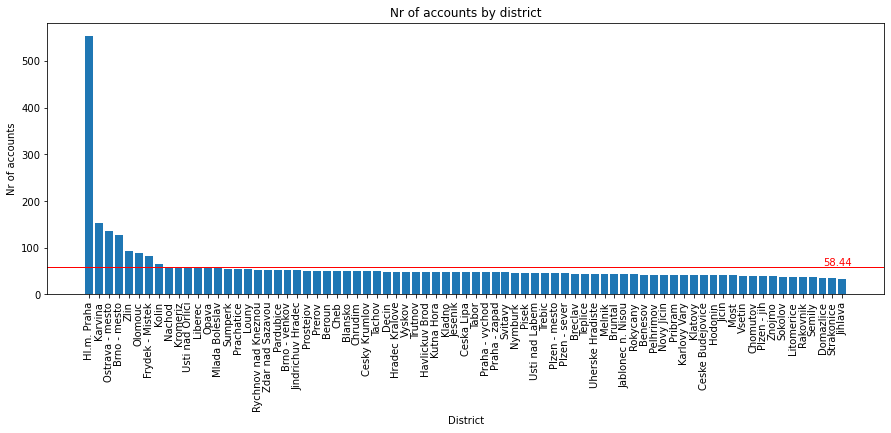

In [41]:
# Plot the number of accounts by district:

#Increase the size of the plot
fig, ax = plt.subplots()
fig.set_size_inches(15, 5, forward=True)

# Plot the mean
ax.axhline((acc_distr.groupby('district name')['account_id'].count()).mean(), color='red', linewidth=1)

# Plot the bars
plt.bar(count_by_dist_name.index, count_by_dist_name)
plt.xticks(rotation=90)
plt.title('Nr of accounts by district')
plt.xlabel('District')
plt.ylabel('Nr of accounts')

# Make some labels.
label = round((acc_distr.groupby('district name')['account_id'].count()).mean(), 2)
x = len(acc_distr.groupby('district name')['account_id'])
y = (acc_distr.groupby('district name')['account_id'].count()).mean()

ax.text(x, y, label, ha='right', va='bottom', color = 'red')

plt.show()

## Number of clients per age group and gender

In [42]:
# Create a pivot table displaying the count of female and male clients per age group

pv_client_age = client.pivot_table(index='age_group',  # Group by
                               columns='gender',  # Group by
                               values='client_id',  # Column to aggregate
                               aggfunc='count')  # Aggregate function
pv_client_age

gender,F,M
age_group,,
10,79,87
20,525,497
30,479,480
40,478,498
50,511,481
60,279,374
70,250,237
80,44,70


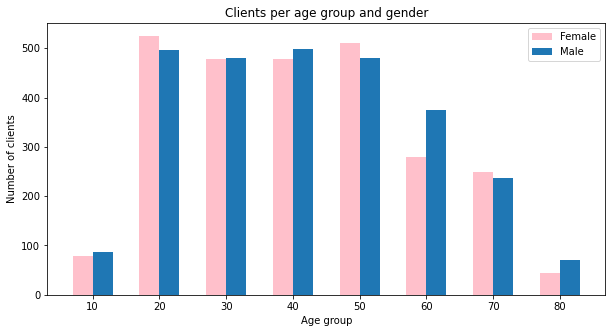

In [43]:
# Plot the client age_group and gender:

# Increase the size of the plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)

# Plot 2 bar plots together
plt.bar(pv_client_age.index, height=pv_client_age['F'], width=3, color='pink')
plt.bar(pv_client_age.index + 3, height=pv_client_age['M'], width=3)

# Fix the tick label of x axis
plt.xticks(pv_client_age.index + 3/2, pv_client_age.index)

# Add label for the plot
plt.title('Clients per age group and gender')
plt.xlabel('Age group')
plt.ylabel('Number of clients')
plt.legend(labels=['Female', 'Male'], loc='upper right')

plt.show()

## Number of clients per age group and gender at the time of account opening

In [44]:
# Extract the year of account opening from date and creating new column 'open_year'

account['open_year'] = 1900 + account['date'].astype(str).str[:2].astype(int)

# Merge client and disp tables to find the clients' age in the year of account opening
client_disp = pd.merge(client, disp, how='inner',
        left_on = 'client_id', right_on = 'client_id').sort_values(by='client_id')
client_disp_account = pd.merge(client_disp, account, how='inner',
        left_on = 'account_id', right_on = 'account_id').sort_values(by='client_id')

# Create a new column for clients' age at the time of account opening
client_disp_account['age_open_acc'] = client_disp_account['open_year'].astype(int) - client_disp_account['birth_year'].astype(int)
client_disp_account['age_open_acc_group'] = (client_disp_account['age_open_acc'] // 10) *10
client_disp_account.groupby('gender')['age_open_acc'].agg('count')

gender
F    2645
M    2724
Name: age_open_acc, dtype: int64

In [45]:
#Create a pivot table displaying the count of female and male clients per age group (age at the time the account was opened)

pv_client_age_account = client_disp_account.pivot_table(index='age_open_acc_group',  # Group by
                               columns='gender',  # Group by
                               values='client_id',  # Column to aggregate
                               aggfunc='count')  # Aggregate function
pv_client_age_account

gender,F,M
age_open_acc_group,,
0,1,2
10,289,296
20,511,462
30,461,500
40,481,490
50,457,458
60,258,292
70,183,218
80,4,6


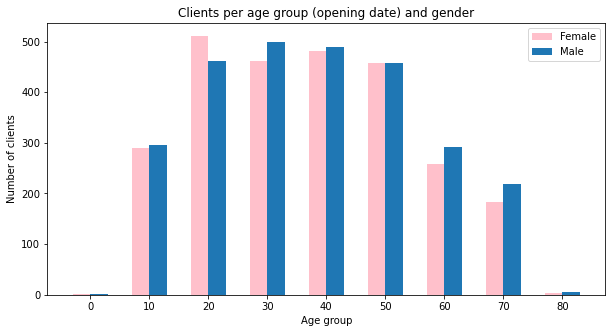

In [46]:
# Plot the client age_open_acc_group and gender using a vertical bar chart:

# Increase the size of the plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)

# Plot 2 bar plots together
plt.bar(pv_client_age_account.index, height=pv_client_age_account['F'], width=3, color='pink')
plt.bar(pv_client_age_account.index + 3, height=pv_client_age_account['M'], width=3)

# Fix the tick label of x axis
plt.xticks(pv_client_age_account.index + 3/2, pv_client_age_account.index)

# Add label for the plot
plt.title('Clients per age group (opening date) and gender')
plt.xlabel('Age group')
plt.ylabel('Number of clients')
plt.legend(labels=['Female', 'Male'], loc='upper right')

plt.show()

## Average salary by district

In [47]:
# Using pivot table to find average salary by district: 

pv_avg_sal_district = district.pivot_table(index = 'district name', values = 'average salary', aggfunc = 'mean')
pv_avg_sal_district.sort_values('average salary', ascending = False).head(10)

# Actually no reason to use pivot table because districts are unique in this table

,average salary
district name,
Hl.m. Praha,12541
Mlada Boleslav,11277
Plzen - mesto,10787
Ostrava - mesto,10673
Most,10446
Karvina,10177
Praha - vychod,10124
Ceske Budejovice,10045
Melnik,9920


In [48]:
# Without pivot table, using .groupby:

avg_sal_by_dist = district.groupby('district name')['average salary'].mean().sort_values(ascending=False)
avg_sal_by_dist.head(10)

district name
Hl.m. Praha         12541
Mlada Boleslav      11277
Plzen - mesto       10787
Ostrava - mesto     10673
Most                10446
Karvina             10177
Praha - vychod      10124
Ceske Budejovice    10045
Melnik               9920
Brno - mesto         9897
Name: average salary, dtype: int64

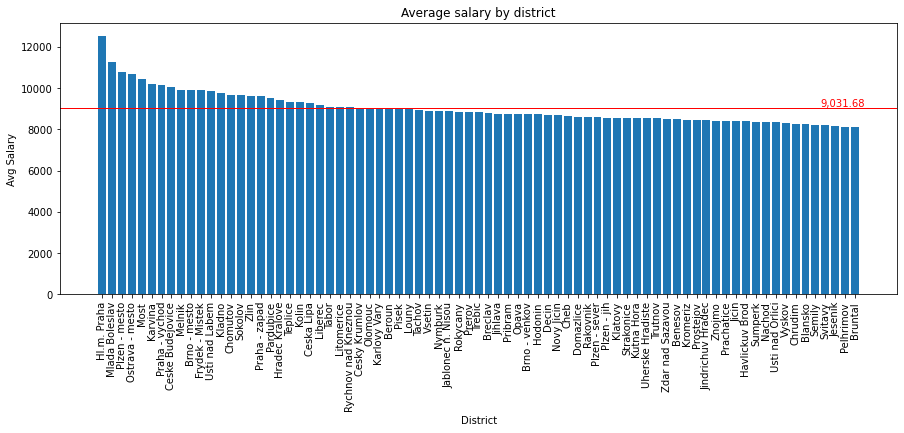

In [49]:
# Plot average salary by district using a vertical bar chart:

fig, ax = plt.subplots()
fig.set_size_inches(15, 5, forward=True)
ax.axhline((district.groupby('district name')['average salary'].mean()).mean(), color='red', linewidth=1)
plt.bar(avg_sal_by_dist.index, avg_sal_by_dist.sort_values(ascending= False))
plt.xticks(rotation=90)
plt.title('Average salary by district')
plt.xlabel('District')
plt.ylabel('Avg Salary')

label = "{:,}".format(round((district.groupby('district name')['average salary'].mean()).mean(), 2))
x = len(district.groupby('district name')['average salary'])
y = (district.groupby('district name')['average salary'].mean()).mean()

ax.text(x, y, label, ha='right', va='bottom', color = 'red')

plt.show()

## Average salary by region

In [50]:
# Create a pivot table calculating the mean average salary by region: 

pv_avg_sal_reg = district.pivot_table(index = 'region', values = 'average salary', aggfunc = 'mean')
pv_avg_sal_reg = pv_avg_sal_reg.sort_values('average salary', ascending = False)

pv_avg_sal_reg

# In this case, the only possible solution is using a pivot table because we are looking for the mean average salary 
# throughout the different regions

,average salary
region,
Prague,12541.000000
central Bohemia,9357.250000
north Bohemia,9334.200000
north Moravia,9049.181818
west Bohemia,9015.400000
south Bohemia,8831.500000
south Moravia,8728.500000
east Bohemia,8611.181818


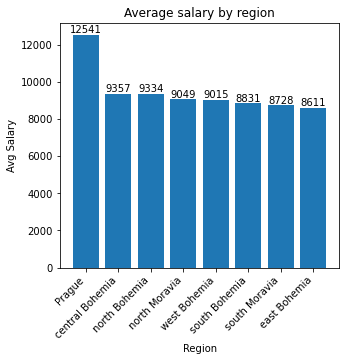

In [51]:
# Plot average salary by region using a vertical bar chart:

fig, ax = plt.subplots()
fig.set_size_inches(5, 5, forward=True)
plt.bar(pv_avg_sal_reg.index, pv_avg_sal_reg['average salary'])
fig.autofmt_xdate(rotation=45)
plt.title('Average salary by region')
plt.xlabel('Region')
plt.ylabel('Avg Salary')

rects = ax.patches

# Make some labels.
labels = pv_avg_sal_reg['average salary'].astype(np.int64)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom')

plt.show()

## Number of accounts by Loan Status

In [52]:
# Group loan table by status to find the number of accounts by loan status

count_by_loan_status = acc_loan.groupby('status')['account_id'].count()
count_by_loan_status

status
A    203
B     31
C    403
D     45
Name: account_id, dtype: int64

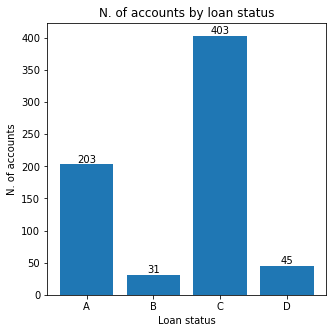

In [53]:
# Plot the number of accounts by loan status using a vertical bar chart:

fig, ax = plt.subplots()
fig.set_size_inches(5, 5, forward=True)
plt.bar(count_by_loan_status.index, count_by_loan_status)
plt.title('N. of accounts by loan status')
plt.xlabel('Loan status')
plt.ylabel('N. of accounts')

rects = ax.patches

# Make some labels.
labels = count_by_loan_status

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom')

plt.show()

## Credit and withdrawal by age group

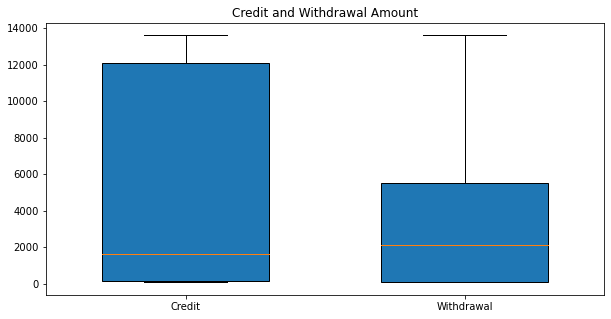

In [54]:
# Use box plot to see the overall distribution of amounts spent in withdrawal and credit

box_plot_data = [trans.loc[trans['type'] == 'credit', 'amount'], trans.loc[trans['type'] == 'withdrawal', 'amount']]

plt.figure(figsize=(10,5))
plt.boxplot(box_plot_data,patch_artist=True,labels=['Credit', 'Withdrawal'], widths = (0.6, 0.6))
plt.title('Credit and Withdrawal Amount')
plt.show()

In [55]:
# See total amount spent on credit by each account

trans[trans['type'] == 'credit'].groupby('account_id')['amount'].sum()

account_id
1         194565.25
2        1011171.95
3         173114.00
4         192358.25
5          97549.45
            ...    
11333     901805.10
11349     607068.15
11359     705964.85
11362     531233.55
11382     555558.55
Name: amount, Length: 4500, dtype: float64

In [56]:
# Focus only on the account owners

owners = disp[disp['type'] == 'OWNER']
owners_age = pd.merge(owners.set_index('client_id'), client, on = 'client_id', how = 'inner')
owners_age.head()

,client_id,disp_id,account_id,type,birth_number,district_id,birth_year,birth_month,birth_day,gender,age,age_group
0,1,1,1,OWNER,706213,18,1970,12,13,F,29,20
1,2,2,2,OWNER,450204,1,1945,2,4,M,54,50
2,4,4,3,OWNER,561201,5,1956,12,1,M,43,40
3,6,6,4,OWNER,190922,12,1919,9,22,M,80,80
4,7,7,5,OWNER,290125,15,1929,1,25,M,70,70


In [57]:
# Join trans and owner_age to see owners' age at the time of transaction

trans_owners_age = pd.merge(trans, owners_age, on = 'account_id', how = 'inner')
trans_owners_age.head()

,trans_id,account_id,date,type_x,operation,amount,balance,k_symbol,bank,account,...,disp_id,type_y,birth_number,district_id,birth_year,birth_month,birth_day,gender,age,age_group
0,695247,2378,930101,credit,credit in cash,700.0,700.0,interest credited,Other,Other,...,2873,OWNER,755324,16,1975,3,24,F,24,20
1,695250,2378,930122,credit,credit in cash,7268.0,7968.0,old age pension,Other,Other,...,2873,OWNER,755324,16,1975,3,24,F,24,20
2,695266,2378,930123,credit,credit in cash,13600.0,22408.0,old age pension,Other,Other,...,2873,OWNER,755324,16,1975,3,24,F,24,20
3,695262,2378,930124,credit,credit in cash,13600.0,72160.0,old age pension,Other,Other,...,2873,OWNER,755324,16,1975,3,24,F,24,20
4,695265,2378,930126,credit,credit in cash,13600.0,94059.0,old age pension,Other,Other,...,2873,OWNER,755324,16,1975,3,24,F,24,20


In [58]:
# Group previous table by age group both for credit and withdrawal 

credit_by_age = trans_owners_age[trans_owners_age['type_x'] == 'credit'].groupby('age_group')['amount'].sum()
withdrawal_by_age = trans_owners_age[trans_owners_age['type_x'] == 'withdrawal'].groupby('age_group')['amount'].sum()

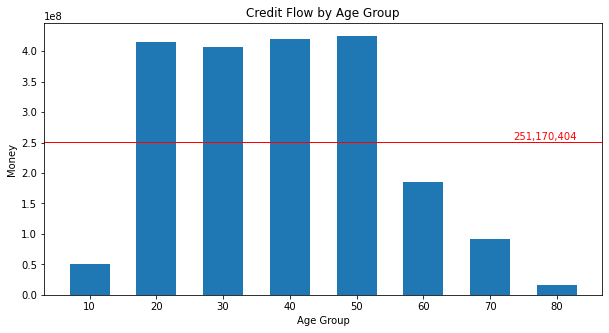

In [59]:
# Plot the Credit Flow by Age Group using a vertical bar chart:

fig, ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)
ax.axhline(credit_by_age.mean(), color='red', linewidth=1)
plt.bar(credit_by_age.index, credit_by_age, width = 6)
plt.title('Credit Flow by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Money')

label = "{:,}".format(round(credit_by_age.mean()))
x = 83
y = credit_by_age.mean()

ax.text(x, y, label, ha='right', va='bottom', color = 'red')

plt.show()

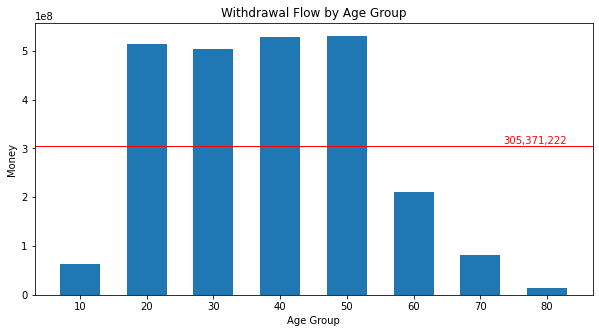

In [60]:
# Plot the Withdrawal Flow by Age Group using a vertical bar chart:

fig, ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)
ax.axhline(withdrawal_by_age.mean(), color='red', linewidth=1)
plt.bar(withdrawal_by_age.index, withdrawal_by_age, width = 6)
plt.title('Withdrawal Flow by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Money')

label = "{:,}".format(round(withdrawal_by_age.mean()))
x = 83
y = withdrawal_by_age.mean()

ax.text(x, y, label, ha='right', va='bottom', color = 'red')

plt.show()

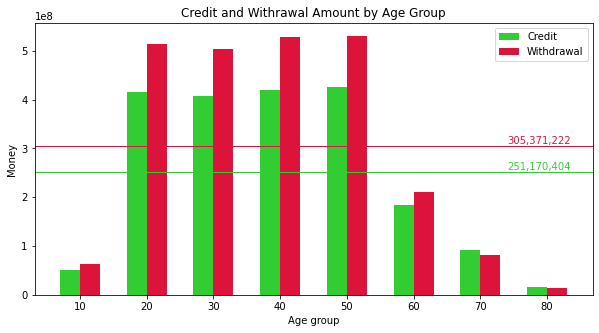

In [61]:
# Plot Credit and Withdrawal together by Age group using a vertical bar chart:

# Increase the size of the plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)

# Plot 2 bar plots together
plt.bar(credit_by_age.index, credit_by_age, width=3, color='LimeGreen')
plt.bar(withdrawal_by_age.index + 3, withdrawal_by_age, width=3, color = 'Crimson')

# Add label for the plot
plt.title('Credit and Withrawal Amount by Age Group')
plt.xlabel('Age group')
plt.ylabel('Money')
plt.legend(labels=['Credit', 'Withdrawal'], loc='upper right')

# Plot 2 mean lines
ax.axhline(credit_by_age.mean(), color='LimeGreen', linewidth=1)
ax.text(85, credit_by_age.mean(), "{:,}".format(round(credit_by_age.mean())), ha='right', va='bottom', color = 'LimeGreen')
ax.axhline(withdrawal_by_age.mean(), linewidth=1, color = 'Crimson')
ax.text(85, withdrawal_by_age.mean(), "{:,}".format(round(withdrawal_by_age.mean())), ha='right', va='bottom', color = 'Crimson')

# Fix the tick label of x axis
plt.xticks(credit_by_age.index + 3/2, credit_by_age.index)


plt.show()

## Operations types by age group

In [62]:
# Create 2 pivot tables (1 for credit and 1 for withdrawal) to see to see amount spent on each operation type by age group 

credit_to_wide = trans_owners_age.loc[trans_owners_age['type_x'] == 'credit', ['operation', 'amount', 'age_group']]
pt_cred = credit_to_wide.pivot_table(index = 'age_group', columns = 'operation', values = 'amount', aggfunc = 'sum')

with_to_wide = trans_owners_age.loc[trans_owners_age['type_x'] == 'withdrawal', ['operation', 'amount', 'age_group']]
pt_with = with_to_wide.pivot_table(index = 'age_group', columns = 'operation', values = 'amount', aggfunc = 'sum')

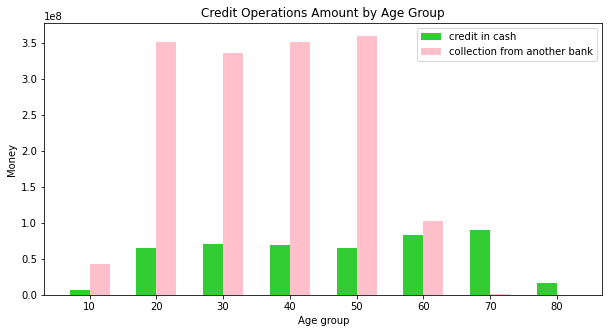

In [63]:
# Plot Credit Operations by Age group using a vertical bar chart:

# Increase the size of the plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)

# Plot 2 bar plots together
plt.bar(pt_cred.index, pt_cred[pt_cred.columns[0]], width=3, color='LimeGreen')
plt.bar(pt_cred.index + 3, pt_cred[pt_cred.columns[1]], width=3, color = 'pink')

# Add labels for the plot
plt.title('Credit Operations Amount by Age Group')
plt.xlabel('Age group')
plt.ylabel('Money')
plt.legend(labels=['credit in cash', 'collection from another bank'], loc='upper right')

# Fix the tick label of x axis
plt.xticks(pt_cred.index + 3/2, pt_cred.index)

plt.show()

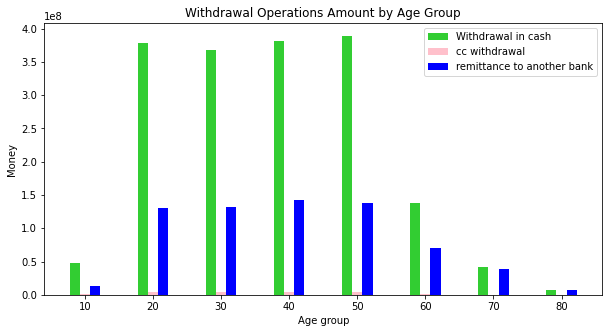

In [64]:
# Plot Withdrawal Operations by Age group using a vertical bar chart:

# Increase the size of the plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)

# Plot 3 bar plots together
plt.bar(pt_with.index - 3/2, pt_with[pt_with.columns[0]], width=3/2, color='LimeGreen')
plt.bar(pt_with.index, pt_with[pt_with.columns[1]], width=3/2, color = 'pink')
plt.bar(pt_with.index + 3/2, pt_with[pt_with.columns[2]], width=3/2, color = 'Blue')

# Add labels for the plot
plt.title('Withdrawal Operations Amount by Age Group')
plt.xlabel('Age group')
plt.ylabel('Money')
plt.legend(labels=['Withdrawal in cash', 'cc withdrawal', 'remittance to another bank'], loc='upper right')

# Fix the tick label of x axis
plt.xticks(pt_with.index, pt_with.index)

plt.show()

## Average vs Total Loan Expenses by Age Group

In [65]:
# Group trans_owners_age by age_group to see the average and total loan expense by age group 

avg_loan_exp_by_age = trans_owners_age[trans_owners_age['k_symbol'] == 'loan payment'].groupby('age_group')['amount'].mean()
tot_loan_exp_by_age = trans_owners_age[trans_owners_age['k_symbol'] == 'loan payment'].groupby('age_group')['amount'].sum()

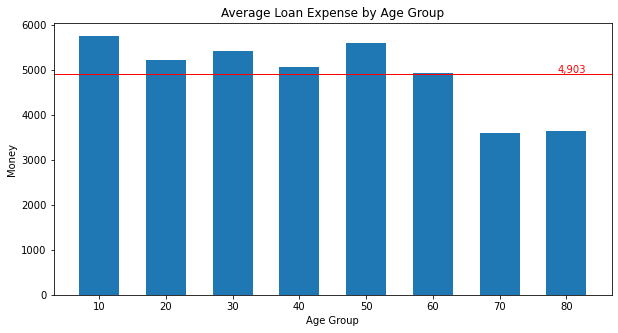

In [66]:
# Plot the Average Loan Expense by Age Group using a vertical bar chart:

fig, ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)
ax.axhline(avg_loan_exp_by_age.mean(), color='red', linewidth=1)
plt.bar(avg_loan_exp_by_age.index, avg_loan_exp_by_age, width = 6)
plt.title('Average Loan Expense by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Money')

label = "{:,}".format(round(avg_loan_exp_by_age.mean()))
x = 83
y = avg_loan_exp_by_age.mean()

ax.text(x, y, label, ha='right', va='bottom', color = 'red')

plt.show()

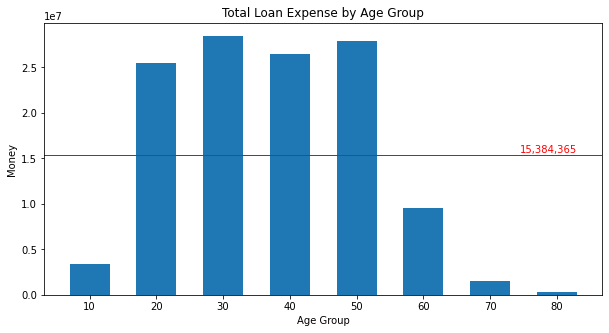

In [67]:
# Plot the Total Loan Expense by Age Group using a vertical bar chart:

fig, ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)
ax.axhline(tot_loan_exp_by_age.mean(), color='red', linewidth=1)
plt.bar(tot_loan_exp_by_age.index, tot_loan_exp_by_age, width = 6)
plt.title('Total Loan Expense by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Money')

label = "{:,}".format(round(tot_loan_exp_by_age.mean()))
x = 83
y = tot_loan_exp_by_age.mean()

ax.text(x, y, label, ha='right', va='bottom', color = 'red')

plt.show()

## Average Loan Expense against Average salary

In [68]:
# Merge trans_owners_age and district and then group by district to search a correlation between average loan expense and
# average salary in each district

trans_owners_age_distr = pd.merge(trans_owners_age, district[['district_id', 'district name', 'average salary']], on = 'district_id', how = 'inner')
grouped_loan_exp = trans_owners_age_distr.loc[trans_owners_age_distr['k_symbol'] == 'loan payment'].groupby('district name')['amount'].mean()

# Calculate the average salary per district
avg_sal_distr = trans_owners_age_distr.groupby('district name')['average salary'].mean()

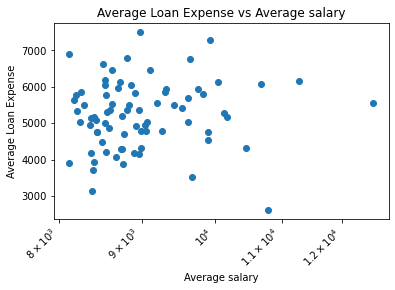

In [69]:
# Plot Average Loan Expense vs Average salary using a scatter plot 
fig, ax = plt.subplots()
plt.scatter(avg_sal_distr, grouped_loan_exp)
plt.xscale('log')
plt.title('Average Loan Expense vs Average salary')
plt.xlabel('Average salary')
plt.ylabel('Average Loan Expense')
ax.set_xticks(np.arange(8000, 13000, 1000))
fig.autofmt_xdate(rotation=45)
plt.show()

In [70]:
# Actual correlation
avg_sal_by_dist.corr(grouped_loan_exp) # no apparent correlation

0.07322354088222845